In [1]:
import ipywidgets as widgets
import pyhf
import json
import matplotlib.pyplot as plt
import numpy as np
from pyhf.contrib.viz import brazil

pyhf.set_backend(pyhf.tensor.numpy_backend(),pyhf.optimize.minuit_optimizer())

## simplest model :: data = 1, bg = 1

In [3]:
model = pyhf.Model(
{
  "channels": [
    {
      "name": "singlechannel",
      "samples": [
        {
          "name": "signal",
          "data": [
            1.0
          ],
          "modifiers": [
            {
              "name": "mu",
              "type": "normfactor",
              "data": None
            }
          ]
        },
        {
          "name": "background",
          "data": [
            1.0
          ],
          "modifiers": [
              
          ]
        }
      ]
    }
  ]
}
)

In [4]:
observations = [2.0] + model.config.auxdata

In [5]:
pyhf.infer.mle.fit(data=observations, pdf=model, return_result_obj = True)

(array([1.]),
      corr: array([[1.]])
       fun: array(2.61370564)
  hess_inv: [[2.00000012]]
   message: 'Optimization terminated successfully.'
    minuit: <FMin algorithm='Migrad' edm=3.944212241699335e-21 edm_goal=0.0002 errordef=1.0 fval=2.613705638880109 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=True hesse_failed=False is_above_max_edm=False is_valid=True nfcn=18 ngrad=0 reduced_chi2=nan>
 (Param(number=0, name='x0', value=1.0000000000000002, error=1.3624142315306218, merror=None, is_const=False, is_fixed=False, lower_limit=0.0, upper_limit=10.0),)
 [[2.00000012]]
      nfev: 18
      njev: 0
   success: True
       unc: array([1.36241423])
         x: array([1.]))

In [6]:
CLs_obs, CLs_exp = pyhf.infer.hypotest(
    1.0,  # null hypothesis
    observations, #+ model.config.auxdata,
    model,
    test_stat="qtilde",
    return_expected_set=True,
)
print(f"      Observed CLs: {CLs_obs:.4f}")
for expected_value, n_sigma in zip(CLs_exp, np.arange(-2, 3)):
    print(f"Expected CLs({n_sigma:2d} σ): {expected_value:.4f}")

      Observed CLs: 0.6383
Expected CLs(-2 σ): 0.1182
Expected CLs(-1 σ): 0.2349
Expected CLs( 0 σ): 0.4334
Expected CLs( 1 σ): 0.6962
Expected CLs( 2 σ): 0.9088


/Users/souravdey/pyhf/lib/python3.8/site-packages/pyhf/optimize/opt_minuit.py:130: IMinuitWarning: Hesse called with all parameters fixed
  minimizer.hesse()


In [7]:
poi_values = np.linspace(0.1, 5, 50)
obs_limit, exp_limits, (scan, results) = pyhf.infer.intervals.upperlimit(
    observations, model, poi_values, level=0.05, return_results=True
)
print(f"Upper limit (obs): μ = {obs_limit:.4f}")
print(f"Upper limit (exp): μ = {exp_limits[2]:.4f}")

Upper limit (obs): μ = 4.6871
Upper limit (exp): μ = 3.4032


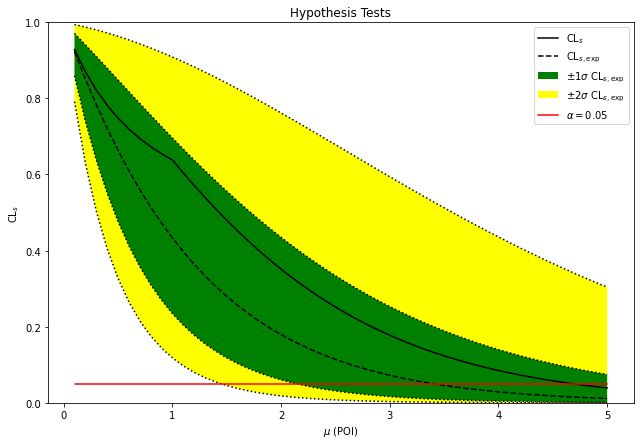

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 7)
ax.set_title("Hypothesis Tests")

artists = brazil.plot_results(poi_values, results, ax=ax)

## Now, we add some bg uncertainty

In [10]:
model = pyhf.Model(
{
  "channels": [
    {
      "name": "singlechannel",
      "samples": [
        {
          "name": "signal",
          "data": [
            1.0
          ],
          "modifiers": [
            {
              "name": "mu",
              "type": "normfactor",
              "data": None
            }
          ]
        },
        {
          "name": "background",
          "data": [
            1.0
          ],
          "modifiers": [
              {
                  "name": "uncorr_bkguncrt",
                  "type": "shapesys",
                  "data": [
                    1.0
                  ]
            }
              
          ]
        }
      ]
    }
  ]
}
)


In [11]:
observations = [2.0] + model.config.auxdata

In [12]:
pyhf.infer.mle.fit(data=observations, pdf=model, return_result_obj = True)

(array([1., 1.]),
      corr: array([[ 1.        , -0.57733762],
        [-0.57733762,  1.        ]])
       fun: array(4.61370564)
  hess_inv: [[ 2.99993445 -0.99995603]
  [-0.99995603  0.99997773]]
   message: 'Optimization terminated successfully.'
    minuit: <FMin algorithm='Migrad' edm=2.8299691618614664e-20 edm_goal=0.0002 errordef=1.0 fval=4.613705638880109 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=True hesse_failed=False is_above_max_edm=False is_valid=True nfcn=34 ngrad=0 reduced_chi2=nan>
 (Param(number=0, name='x0', value=1.0000000000000002, error=1.637400989343817, merror=None, is_const=False, is_fixed=False, lower_limit=0.0, upper_limit=10.0), Param(number=1, name='x1', value=1.0000000000000002, error=0.9815735670696641, merror=None, is_const=False, is_fixed=False, lower_limit=1e-10, upper_limit=10.0))
 [[ 2.99993445 -0.99995603]
  [-0.999956

In [13]:
CLs_obs, CLs_exp = pyhf.infer.hypotest(
    1.0,  # null hypothesis
    observations ,#+ model.config.auxdata,
    model,
    test_stat="qtilde",
    return_expected_set=True,
)
print(f"      Observed CLs: {CLs_obs:.4f}")
for expected_value, n_sigma in zip(CLs_exp, np.arange(-2, 3)):
    print(f"Expected CLs({n_sigma:2d} σ): {expected_value:.4f}")

      Observed CLs: 0.7007
Expected CLs(-2 σ): 0.2274
Expected CLs(-1 σ): 0.3713
Expected CLs( 0 σ): 0.5728
Expected CLs( 1 σ): 0.7947
Expected CLs( 2 σ): 0.9460


In [14]:
poi_values = np.linspace(0.1, 5, 50)
obs_limit, exp_limits, (scan, results) = pyhf.infer.intervals.upperlimit(
    observations, model, poi_values, level=0.05, return_results=True
)
print(f"Upper limit (obs): μ = {obs_limit:.4f}")
print(f"Upper limit (exp): μ = {exp_limits[2]:.4f}")

Upper limit (obs): μ = 5.0000
Upper limit (exp): μ = 4.1820


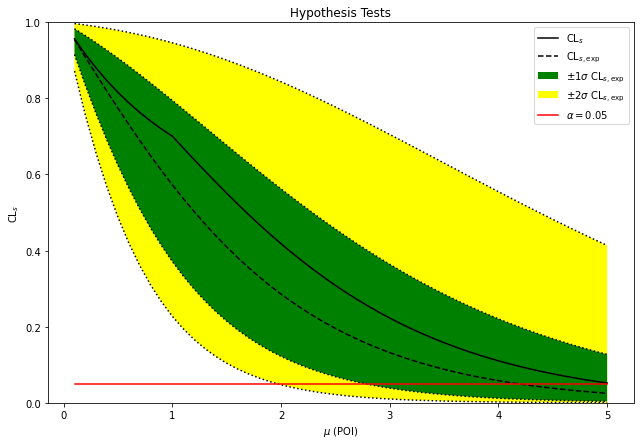

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 7)
ax.set_title("Hypothesis Tests")

artists = brazil.plot_results(poi_values, results, ax=ax)

# the band shifts more right. Maybe this is not visible with this particular model. So, I redo the same steps with sig = 10 and bg = 10 to reduce Poisson Uncertainty

In [16]:
model = pyhf.Model(
{
  "channels": [
    {
      "name": "singlechannel",
      "samples": [
        {
          "name": "signal",
          "data": [
            10.0
          ],
          "modifiers": [
            {
              "name": "mu",
              "type": "normfactor",
              "data": None
            }
          ]
        },
        {
          "name": "background",
          "data": [
            10.0
          ],
          "modifiers": [
              
          ]
        }
      ]
    }
  ]
}
)

In [17]:
observations = [20.0] + model.config.auxdata

In [18]:
pyhf.infer.mle.fit(data=observations, pdf=model, return_result_obj = True)

(array([0.99999998]),
      corr: array([[1.]])
       fun: array(4.84194198)
  hess_inv: [[0.19999928]]
   message: 'Optimization terminated successfully.'
    minuit: <FMin algorithm='Migrad' edm=1.1984424949052505e-15 edm_goal=0.0002 errordef=1.0 fval=4.841941979347325 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=True hesse_failed=False is_above_max_edm=False is_valid=True nfcn=20 ngrad=0 reduced_chi2=nan>
 (Param(number=0, name='x0', value=0.9999999845234788, error=0.4455582967932207, merror=None, is_const=False, is_fixed=False, lower_limit=0.0, upper_limit=10.0),)
 [[0.19999928]]
      nfev: 20
      njev: 0
   success: True
       unc: array([0.4455583])
         x: array([0.99999998]))

In [19]:
CLs_obs, CLs_exp = pyhf.infer.hypotest(
    1.0,  # null hypothesis
    observations, #+ model.config.auxdata,
    model,
    test_stat="qtilde",
    return_expected_set=True,
)
print(f"      Observed CLs: {CLs_obs:.4f}")
for expected_value, n_sigma in zip(CLs_exp, np.arange(-2, 3)):
    print(f"Expected CLs({n_sigma:2d} σ): {expected_value:.4f}")

      Observed CLs: 0.5033
Expected CLs(-2 σ): 0.0002
Expected CLs(-1 σ): 0.0016
Expected CLs( 0 σ): 0.0132
Expected CLs( 1 σ): 0.0830
Expected CLs( 2 σ): 0.3239


/Users/souravdey/pyhf/lib/python3.8/site-packages/pyhf/optimize/opt_minuit.py:130: IMinuitWarning: Hesse called with all parameters fixed
  minimizer.hesse()


In [20]:
poi_values = np.linspace(0.1, 5, 50)
obs_limit, exp_limits, (scan, results) = pyhf.infer.intervals.upperlimit(
    observations, model, poi_values, level=0.05, return_results=True
)
print(f"Upper limit (obs): μ = {obs_limit:.4f}")
print(f"Upper limit (exp): μ = {exp_limits[2]:.4f}")

Upper limit (obs): μ = 1.8346
Upper limit (exp): μ = 0.7597


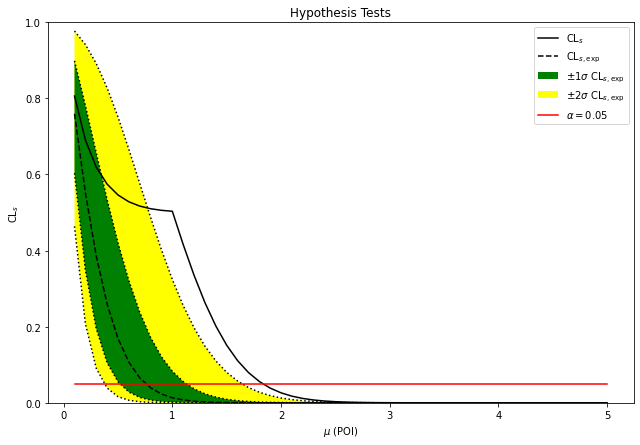

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 7)
ax.set_title("Hypothesis Tests")

artists = brazil.plot_results(poi_values, results, ax=ax)

In [22]:
model = pyhf.Model(
{
  "channels": [
    {
      "name": "singlechannel",
      "samples": [
        {
          "name": "signal",
          "data": [
            10.0
          ],
          "modifiers": [
            {
              "name": "mu",
              "type": "normfactor",
              "data": None
            }
          ]
        },
        {
          "name": "background",
          "data": [
            10.0
          ],
          "modifiers": [
              {
                  "name": "uncorr_bkguncrt",
                  "type": "shapesys",
                  "data": [
                    5.0
                  ]
            }
              
          ]
        }
      ]
    }
  ]
}
)


In [23]:
observations = [20.0] + model.config.auxdata

In [24]:
pyhf.infer.mle.fit(data=observations, pdf=model, return_result_obj = True)

(array([1., 1.]),
      corr: array([[ 1.        , -0.74534554],
        [-0.74534554,  1.        ]])
       fun: array(8.10769475)
  hess_inv: [[ 0.4499827  -0.24998717]
  [-0.24998717  0.24999097]]
   message: 'Optimization terminated successfully.'
    minuit: <FMin algorithm='Migrad' edm=1.5159398943762464e-19 edm_goal=0.0002 errordef=1.0 fval=8.107694751084093 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=True hesse_failed=False is_above_max_edm=False is_valid=True nfcn=34 ngrad=0 reduced_chi2=nan>
 (Param(number=0, name='x0', value=1.0000000000000002, error=0.6652316052691014, merror=None, is_const=False, is_fixed=False, lower_limit=0.0, upper_limit=10.0), Param(number=1, name='x1', value=1.0000000000000002, error=0.4976794908321729, merror=None, is_const=False, is_fixed=False, lower_limit=1e-10, upper_limit=10.0))
 [[ 0.4499827  -0.24998717]
  [-0.24998

In [25]:
CLs_obs, CLs_exp = pyhf.infer.hypotest(
    1.0,  # null hypothesis
    observations, #+ model.config.auxdata,
    model,
    test_stat="qtilde",
    return_expected_set=True,
)
print(f"      Observed CLs: {CLs_obs:.4f}")
for expected_value, n_sigma in zip(CLs_exp, np.arange(-2, 3)):
    print(f"Expected CLs({n_sigma:2d} σ): {expected_value:.4f}")

      Observed CLs: 0.5455
Expected CLs(-2 σ): 0.0158
Expected CLs(-1 σ): 0.0543
Expected CLs( 0 σ): 0.1670
Expected CLs( 1 σ): 0.4174
Expected CLs( 2 σ): 0.7487


In [26]:
poi_values = np.linspace(0.1, 5, 50)
obs_limit, exp_limits, (scan, results) = pyhf.infer.intervals.upperlimit(
    observations, model, poi_values, level=0.05, return_results=True
)
print(f"Upper limit (obs): μ = {obs_limit:.4f}")
print(f"Upper limit (exp): μ = {exp_limits[2]:.4f}")

Upper limit (obs): μ = 2.0993
Upper limit (exp): μ = 1.3978


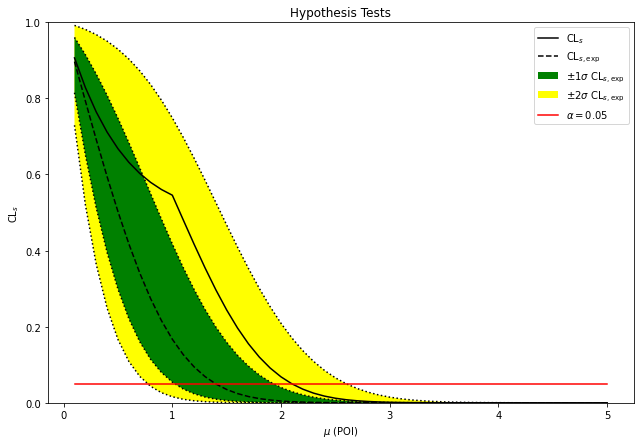

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 7)
ax.set_title("Hypothesis Tests")

artists = brazil.plot_results(poi_values, results, ax=ax)